In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

print("Dataset after loading:")

# Load the dataset
data = pd.read_csv('rba_dataset.csv')
data

Dataset after loading:


,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,0,43:30.8,-4.320000e+18,NaN,10.0.65.171,NO,-,-,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False
1,1,43:43.5,-4.320000e+18,NaN,194.87.207.6,AU,-,-,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False
2,2,43:55.9,-3.280000e+18,NaN,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
3,3,43:56.2,-4.320000e+18,NaN,170.39.78.152,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False
4,4,43:59.4,-4.620000e+18,NaN,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,09:51.4,3.050000e+18,NaN,92.220.33.86,NO,Vestland,Hauglandshella,29695,Mozilla/5.0 (Linux; Android 5.5.1; CHM-U01) A...,Chrome Mobile WebView 85.0.4183,Android 5.5.1,mobile,False,False,False
1996,1996,09:52.5,7.570000e+18,NaN,217.170.207.212,NO,-,-,34989,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
1997,1997,09:52.8,5.980000e+18,NaN,10.0.82.146,PL,-,-,205727,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Firefox 20.0.0.1618,Android 4.1,mobile,True,False,False
1998,1998,09:53.0,5.420000e+18,NaN,79.160.196.194,NO,Rogaland,Stavanger,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 14_2_1 lik...,Chrome Mobile 80.0.3987,iOS 14.2.1,mobile,True,False,False


In [29]:
# Data Preprocessing
print("Dataset after preprocessing:")

def ip_to_numeric(ip):
    try:
        parts = ip.split('.')
        return int(parts[0]) * (256**3) + int(parts[1]) * (256**2) + int(parts[2]) * 256 + int(parts[3])
    except:
        return np.nan

data['IP Address Numeric'] = data['IP Address'].apply(ip_to_numeric)

#Clean the data by filling empty values with the most frequent value in each column
for col in data.columns:
    data[col].fillna(data[col].mode()[0], inplace=True)
    
data


Dataset after preprocessing:


,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,IP Address Numeric
0,0,43:30.8,-4.320000e+18,626.0,10.0.65.171,NO,-,-,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False,167788971
1,1,43:43.5,-4.320000e+18,626.0,194.87.207.6,AU,-,-,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False,3260534534
2,2,43:55.9,-3.280000e+18,626.0,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False,1369935930
3,3,43:56.2,-4.320000e+18,626.0,170.39.78.152,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False,2854702744
4,4,43:59.4,-4.620000e+18,626.0,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False,167772207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,09:51.4,3.050000e+18,626.0,92.220.33.86,NO,Vestland,Hauglandshella,29695,Mozilla/5.0 (Linux; Android 5.5.1; CHM-U01) A...,Chrome Mobile WebView 85.0.4183,Android 5.5.1,mobile,False,False,False,1557930326
1996,1996,09:52.5,7.570000e+18,626.0,217.170.207.212,NO,-,-,34989,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False,3651850196
1997,1997,09:52.8,5.980000e+18,626.0,10.0.82.146,PL,-,-,205727,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Firefox 20.0.0.1618,Android 4.1,mobile,True,False,False,167793298
1998,1998,09:53.0,5.420000e+18,626.0,79.160.196.194,NO,Rogaland,Stavanger,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 14_2_1 lik...,Chrome Mobile 80.0.3987,iOS 14.2.1,mobile,True,False,False,1335936194


Accuracy: 0.8175


              precision    recall  f1-score   support

       False       0.87      0.71      0.78       183
        True       0.79      0.91      0.84       217

    accuracy                           0.82       400
   macro avg       0.83      0.81      0.81       400
weighted avg       0.82      0.82      0.81       400





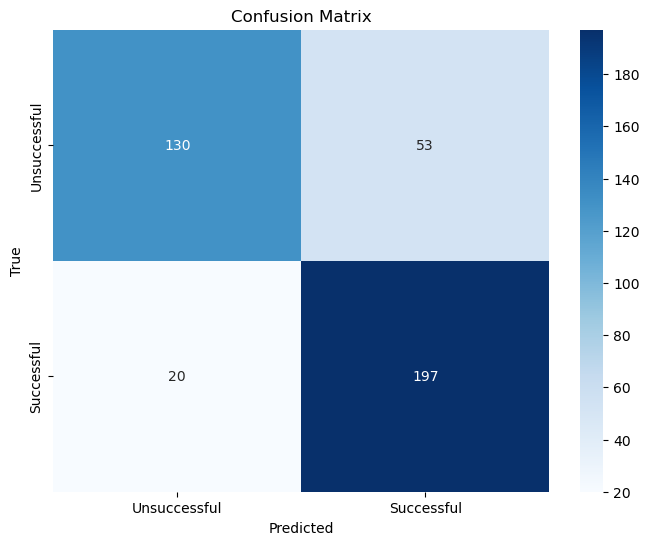

In [26]:
# Features and labels
X = data[['User ID', 'IP Address Numeric']]
y = data['Login Successful']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on testing data using the fitted model
predictions = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))
print("\n")

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unsuccessful', 'Successful'], yticklabels=['Unsuccessful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(knn, file)

print("Model trained and saved Successfully")

Model trained and saved Successfully
